In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Let's simulate a simple dataset
data = {
    'Age': [18, 22, 25, 28, 30, 35, 40, 50, 60, 65],
    'Salary': [15000, 20000, 25000, 27000, 30000, 40000, 50000, 60000, 80000, 85000],
    'Bought_Product': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.head()

,Age,Salary,Bought_Product
0,18,15000,0
1,22,20000,0
2,25,25000,0
3,28,27000,0
4,30,30000,0


In [3]:
# Features and label
X = df[['Age', 'Salary']]
y = df['Bought_Product']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling is very important for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can try K=1, 5, etc.
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.6666666666666666


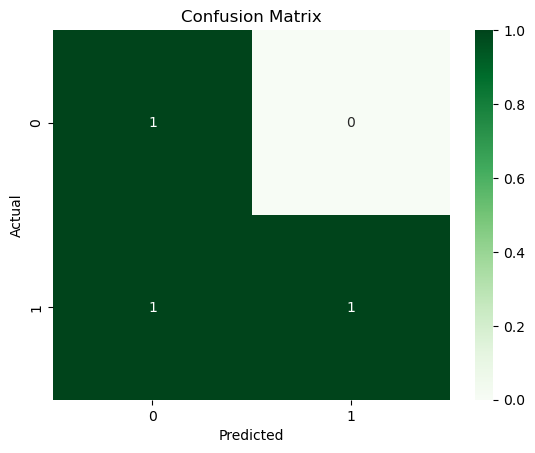

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [5]:
# Predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [6]:
# Predict for a new customer: Age 33, Salary 37000
new_customer = scaler.transform([[33, 37000]])
prediction = knn.predict(new_customer)
print("Prediction (1=Will Buy, 0=Will Not Buy):", prediction[0])

Prediction (1=Will Buy, 0=Will Not Buy): 0


C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


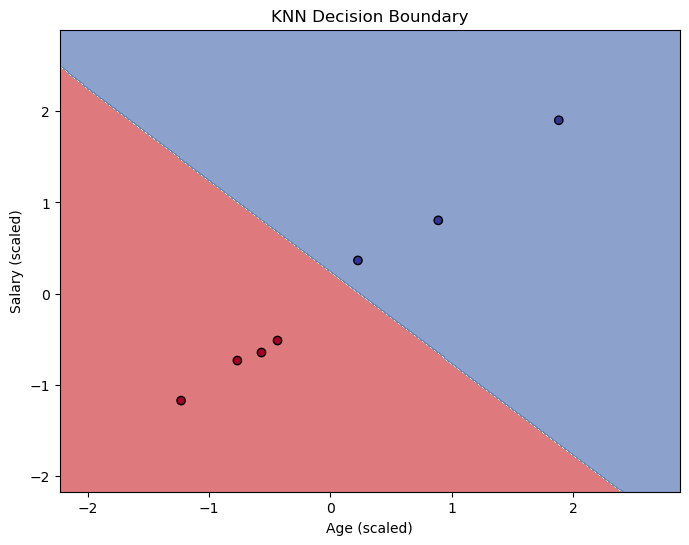

In [7]:
# Create mesh grid
h = .01
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("KNN Decision Boundary")
plt.xlabel("Age (scaled)")
plt.ylabel("Salary (scaled)")
plt.show()